In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
customized_path = "/content/drive/Shareddrives/Urban Computing Project/"
sys.path.append(customized_path)

In [3]:
%cd /content/drive/Shareddrives/Urban\ Computing\ Project/datasets

/content/drive/Shareddrives/Urban Computing Project/datasets


###Unzipping dataset files(Optional)

In [4]:
!unzip taxi_zones.zip

Archive:  taxi_zones.zip
replace taxi_zones.prj? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace taxi_zones.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace taxi_zones.shp? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace taxi_zones.shp.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace taxi_zones.shx? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace taxi_zones.sbn? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace taxi_zones.sbx? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [5]:
!unzip archive.zip

Archive:  archive.zip
replace mta_1706.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace mta_1708.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace mta_1710.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace mta_1712.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


###Exploratory Data Analysis

In [6]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 12.2 MB/s 
     |████████████████████████████████| 6.3 MB 46.9 MB/s 
     |████████████████████████████████| 15.4 MB 53.5 MB/s 


In [7]:
import geopandas as gpd
import pandas as pd
from shapely import wkt
import shapely
import shapely.geometry
import matplotlib.pyplot as plt

##Taxi Dataset

In [8]:
nyc = gpd.read_file("/content/drive/Shareddrives/Urban Computing Project/datasets/taxi_zones.shp")
nyc.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.770 256767.698, 1026495.593 ..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.310 144283.336, 936046.565 14..."


In [9]:
nyc = nyc.to_crs(epsg=4326)

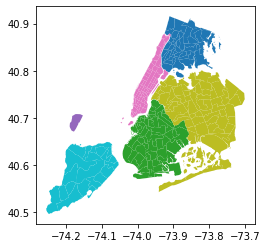

In [ ]:
plot = nyc.plot(column='borough')
fig = plot.get_figure()
fig.savefig('/content/drive/Shareddrives/Urban Computing Project/visualizations/nyborough.png')

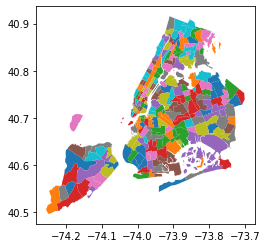

In [ ]:
plot = nyc.plot(column='zone')
fig = plot.get_figure()
fig.savefig('/content/drive/Shareddrives/Urban Computing Project/visualizations/nyzone.png')

In [ ]:
juntaxi = pd.read_csv("/content/drive/Shareddrives/Urban Computing Project/datasets/yellow_tripdata_2017-06.csv")
juntaxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2017-06-08 07:52:31,2017-06-08 08:01:32,6,1.03,1,N,161,140,1,7.5,1.0,0.5,1.86,0.0,0.3,11.16
1,2,2017-06-08 08:08:18,2017-06-08 08:14:00,6,1.03,1,N,162,233,1,6.0,1.0,0.5,2.34,0.0,0.3,10.14
2,2,2017-06-08 08:16:49,2017-06-08 15:43:22,6,5.63,1,N,137,41,2,21.5,1.0,0.5,0.00,0.0,0.3,23.30
3,2,2017-06-29 15:52:35,2017-06-29 16:03:27,6,1.43,1,N,142,48,1,8.5,1.0,0.5,0.88,0.0,0.3,11.18
4,1,2017-06-01 00:00:00,2017-06-01 00:03:43,1,0.60,1,N,140,141,1,4.5,0.5,0.5,2.00,0.0,0.3,7.80


In [ ]:
juntaxi.shape

(9656993, 17)

In [ ]:
coi = ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'PULocationID', 'DOLocationID', 'total_amount']
juntaxi = juntaxi[coi]

In [ ]:
juntaxi['tpep_pickup_datetime'] = pd.to_datetime(juntaxi['tpep_pickup_datetime'], errors = 'coerce')

In [ ]:
juntaxi['tpep_dropoff_datetime'] = pd.to_datetime(juntaxi['tpep_dropoff_datetime'], errors = 'coerce')

In [ ]:
juntaxi['trip_time'] = (juntaxi['tpep_dropoff_datetime']-juntaxi['tpep_pickup_datetime']).astype('timedelta64[s]')

In [ ]:
coi = ['tpep_pickup_datetime', 'trip_time', 'passenger_count', 'trip_distance', 'PULocationID', 'DOLocationID', 'total_amount']
juntaxi = juntaxi[coi]

In [ ]:
juntaxi.head()

,tpep_pickup_datetime,trip_time,passenger_count,trip_distance,PULocationID,DOLocationID,total_amount
0,2017-06-08 07:52:31,541.0,6,1.03,161,140,11.16
1,2017-06-08 08:08:18,342.0,6,1.03,162,233,10.14
2,2017-06-08 08:16:49,26793.0,6,5.63,137,41,23.30
3,2017-06-29 15:52:35,652.0,6,1.43,142,48,11.18
4,2017-06-01 00:00:00,223.0,1,0.60,140,141,7.80


In [ ]:
temp_df = nyc.merge(juntaxi, left_on="LocationID", right_on="PULocationID")

In [ ]:
coi = ['tpep_pickup_datetime', 'trip_time', 'passenger_count', 'trip_distance', 'DOLocationID', 'total_amount', 'zone', 'borough', 'geometry']
temp_df = temp_df[coi]

In [ ]:
temp_df.head()

,tpep_pickup_datetime,trip_time,passenger_count,trip_distance,DOLocationID,total_amount,zone,borough,geometry
0,2017-06-09 20:46:16,26.0,1,0.00,1,80.30,Newark Airport,EWR,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
1,2017-06-29 16:39:32,4449.0,1,33.32,138,147.36,Newark Airport,EWR,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
2,2017-06-10 05:41:35,32.0,2,0.00,1,0.31,Newark Airport,EWR,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
3,2017-06-10 06:53:19,1473.0,1,11.50,265,34.80,Newark Airport,EWR,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
4,2017-06-10 11:12:29,19.0,1,0.00,1,100.80,Newark Airport,EWR,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."


In [ ]:
grouper = temp_df.groupby([pd.Grouper(key='tpep_pickup_datetime', freq='10T'), 'zone'])

In [ ]:
grouper.mean()

trip_time  ...  total_amount
tpep_pickup_datetime zone                                    ...              
2017-06-01 00:00:00  Alphabet City               939.000000  ...     16.573333
                     Astoria                     312.500000  ...      7.465000
                     Bath Beach                  576.000000  ...     16.300000
                     Battery Park                964.000000  ...     15.300000
                     Battery Park City           951.666667  ...     18.971667
...                                                     ...  ...           ...
2017-06-30 23:50:00  Williamsburg (South Side)   707.750000  ...     13.146250
                     Woodside                    483.500000  ...     10.430000
                     World Trade Center         1023.294118  ...     19.736471
                     Yorkville East              718.000000  ...     14.515000
                     Yorkville West              582.365854  ...     13.547805

[372964 rows x 5 columns]

In [ ]:
temp_df = grouper[['trip_time', 'passenger_count', 'trip_distance', 'total_amount']].mean()

In [ ]:
grouper.count()

trip_time  ...  geometry
tpep_pickup_datetime zone                                  ...          
2017-06-01 00:00:00  Alphabet City                      3  ...         3
                     Astoria                            4  ...         4
                     Bath Beach                         1  ...         1
                     Battery Park                       1  ...         1
                     Battery Park City                  6  ...         6
...                                                   ...  ...       ...
2017-06-30 23:50:00  Williamsburg (South Side)          8  ...         8
                     Woodside                           2  ...         2
                     World Trade Center                17  ...        17
                     Yorkville East                     4  ...         4
                     Yorkville West                    41  ...        41

[372964 rows x 7 columns]

In [ ]:
temp_df1 = grouper['passenger_count'].count()

In [ ]:
temp_df1.head()

tpep_pickup_datetime  zone             
2017-06-01            Alphabet City        3
                      Astoria              4
                      Bath Beach           1
                      Battery Park         1
                      Battery Park City    6
Name: passenger_count, dtype: int64

In [ ]:
temp_df1 = temp_df1.to_frame()

In [ ]:
temp_df1 = temp_df1.rename(columns={"passenger_count":"taxi_count"})

In [ ]:
temp_df1.head()

taxi_count
tpep_pickup_datetime zone                         
2017-06-01           Alphabet City               3
                     Astoria                     4
                     Bath Beach                  1
                     Battery Park                1
                     Battery Park City           6

In [ ]:
temp_df.head()

trip_time  ...  total_amount
tpep_pickup_datetime zone                           ...              
2017-06-01           Alphabet City      939.000000  ...     16.573333
                     Astoria            312.500000  ...      7.465000
                     Bath Beach         576.000000  ...     16.300000
                     Battery Park       964.000000  ...     15.300000
                     Battery Park City  951.666667  ...     18.971667

[5 rows x 4 columns]

In [ ]:
temp_df = temp_df.join(temp_df1)

In [ ]:
temp_df.reset_index(inplace=True)

In [ ]:
temp_df.head(100)

,tpep_pickup_datetime,zone,trip_time,passenger_count,trip_distance,total_amount,taxi_count
0,2017-06-01 00:00:00,Alphabet City,939.000000,1.000000,3.110000,16.573333,3
1,2017-06-01 00:00:00,Astoria,312.500000,1.000000,1.172500,7.465000,4
2,2017-06-01 00:00:00,Bath Beach,576.000000,1.000000,4.700000,16.300000,1
3,2017-06-01 00:00:00,Battery Park,964.000000,1.000000,3.760000,15.300000,1
4,2017-06-01 00:00:00,Battery Park City,951.666667,1.666667,3.143333,18.971667,6
...,...,...,...,...,...,...,...
95,2017-06-01 00:10:00,Bloomingdale,431.500000,1.500000,1.245000,14.050000,2
96,2017-06-01 00:10:00,Boerum Hill,637.750000,1.000000,2.347500,12.920000,4
97,2017-06-01 00:10:00,Brooklyn Heights,707.750000,1.000000,2.967500,14.590000,4
98,2017-06-01 00:10:00,Bushwick South,801.500000,1.000000,2.595000,16.200000,2


In [ ]:
temp_df.to_csv('/content/drive/Shareddrives/Urban Computing Project/datasets/juntaxifinal.csv')

Taxi Visualizations

In [ ]:
juntaxi['tpep_pickup_hour'] = juntaxi['tpep_pickup_datetime'].dt.hour

In [ ]:
juntaxi['tpep_pickup_day'] = juntaxi['tpep_pickup_datetime'].dt.day_name()

In [ ]:
grouper = juntaxi.groupby([pd.Grouper(key='tpep_pickup_day'), pd.Grouper(key='tpep_pickup_hour')])

In [ ]:
grouper.count()

tpep_pickup_datetime  ...  total_amount
tpep_pickup_day tpep_pickup_hour                        ...              
Friday          0                                65861  ...         65861
                1                                43553  ...         43553
                2                                26865  ...         26865
                3                                17586  ...         17586
                4                                15377  ...         15377
...                                                ...  ...           ...
Wednesday       19                               82966  ...         82966
                20                               77075  ...         77075
                21                               84921  ...         84921
                22                               80356  ...         80356
                23                               64193  ...         64193

[168 rows x 7 columns]

In [ ]:
temp_df = grouper['trip_distance'].mean()

In [ ]:
temp_df = temp_df.to_frame().reset_index()

In [ ]:
temp_df.head()

,tpep_pickup_day,tpep_pickup_hour,trip_distance
0,Friday,0,3.333902
1,Friday,1,3.410515
2,Friday,2,3.276500
3,Friday,3,3.500709
4,Friday,4,4.458932


In [ ]:
temp_df.set_index('tpep_pickup_hour')

,tpep_pickup_day,trip_distance
tpep_pickup_hour,,
0,Friday,3.333902
1,Friday,3.410515
2,Friday,3.276500
3,Friday,3.500709
4,Friday,4.458932
...,...,...
19,Wednesday,2.626499
20,Wednesday,2.886061
21,Wednesday,3.094611


In [ ]:
temp_df = temp_df.pivot(index='tpep_pickup_hour', columns='tpep_pickup_day', values='trip_distance')

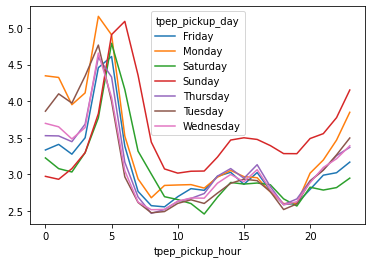

In [ ]:
plot = temp_df.plot()
fig = plot.get_figure()
fig.savefig('/content/drive/Shareddrives/Urban Computing Project/visualizations/taxihourvsdistance.png')

In [ ]:
grouper = juntaxi.groupby([pd.Grouper(key='PULocationID')])

In [ ]:
temp_df = grouper['passenger_count'].count()

In [ ]:
temp_df = temp_df.to_frame().reset_index()

In [ ]:
temp_df.head()

,PULocationID,passenger_count
0,1,729
1,2,11
2,3,27
3,4,23444
4,6,42


In [ ]:
temp_df = nyc.merge(temp_df, left_on="LocationID", right_on="PULocationID")

In [ ]:
temp_df.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,passenger_count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((-74.18445 40.69500, -74.18449 40.695...",1,729
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...",2,11
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((-73.84793 40.87134, -73.84725 40.870...",3,27
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...",4,23444
4,6,0.150491,0.000606,Arrochar/Fort Wadsworth,6,Staten Island,"POLYGON ((-74.06367 40.60220, -74.06351 40.602...",6,42


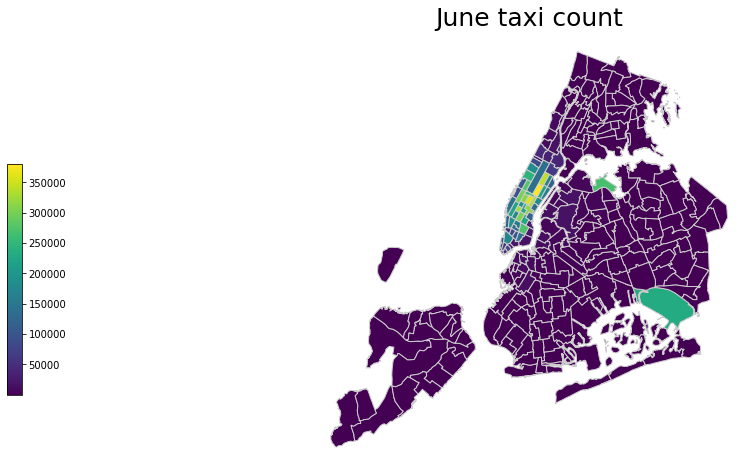

In [ ]:
fig, ax = plt.subplots(1, figsize=(20, 8))
title = 'June taxi count'
col = 'passenger_count'
source = None
vmin = temp_df[col].min()
vmax = temp_df[col].max()
cmap = 'viridis'
# Remove the axis
ax.axis('off')
temp_df.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)
# Add a title
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})

# Create an annotation for the data source
ax.annotate(source, xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', 
            verticalalignment='bottom', fontsize=10)
            
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)

# Empty array for the data range
sm._A = []

# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)
fig.savefig('/content/drive/Shareddrives/Urban Computing Project/visualizations/taxiheatmap.png')

In [ ]:
grouper = juntaxi.groupby([pd.Grouper(key='PULocationID')])

In [ ]:
temp_df = grouper['trip_distance'].mean()

In [ ]:
temp_df = temp_df.to_frame().reset_index()
temp_df.head()

,PULocationID,trip_distance
0,1,2.423347
1,2,12.295455
2,3,3.922593
3,4,2.690715
4,6,3.110476


In [ ]:
temp_df = nyc.merge(temp_df, left_on="LocationID", right_on="PULocationID")

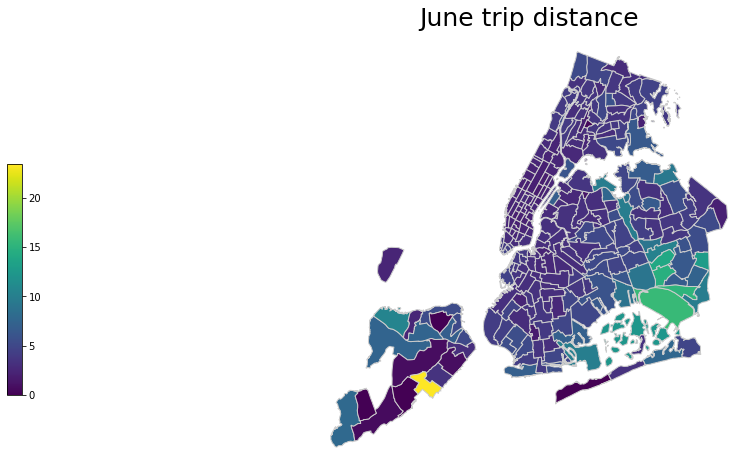

In [ ]:
fig, ax = plt.subplots(1, figsize=(20, 8))
title = 'June trip distance'
col = 'trip_distance'
source = None
vmin = temp_df[col].min()
vmax = temp_df[col].max()
cmap = 'viridis'
# Remove the axis
ax.axis('off')
temp_df.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)
# Add a title
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})

# Create an annotation for the data source
ax.annotate(source, xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', 
            verticalalignment='bottom', fontsize=10)
            
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)

# Empty array for the data range
sm._A = []

# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)
fig.savefig('/content/drive/Shareddrives/Urban Computing Project/visualizations/taxiheatmap2.png')

In [ ]:
grouper = juntaxi.groupby([pd.Grouper(key='tpep_pickup_day'), pd.Grouper(key='tpep_pickup_hour')])

In [ ]:
temp_df = grouper['passenger_count'].count()

In [ ]:
temp_df = temp_df.to_frame().reset_index()

In [ ]:
temp_df.head()

,tpep_pickup_day,tpep_pickup_hour,passenger_count
0,Friday,0,65861
1,Friday,1,43553
2,Friday,2,26865
3,Friday,3,17586
4,Friday,4,15377


In [ ]:
temp_df = temp_df.pivot(index='tpep_pickup_hour', columns='tpep_pickup_day', values='passenger_count')

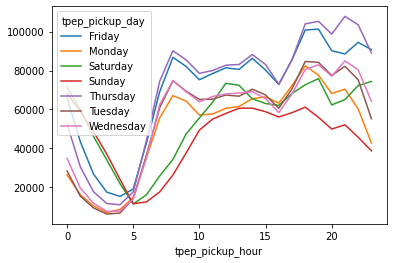

In [ ]:
plot = temp_df.plot()
fig = plot.get_figure()
fig.savefig('/content/drive/Shareddrives/Urban Computing Project/visualizations/taxihourvscount.png')

##Bus Data 

In [10]:
names = range(0, 19)
junbus = pd.read_csv("/content/drive/Shareddrives/Urban Computing Project/datasets/mta_1706.csv", names=names)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,4,5,7,8,10,11,14,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
junbus[[17, 18]].describe(include='all')

,17,18
count,418,0.0
unique,116,NaN
top,16:06:08,NaN
freq,11,NaN
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN


In [12]:
junbus.drop(columns=18, inplace=True)

In [13]:
headers = junbus.iloc[0]
headers = headers.fillna(value='unknown')
junbus = junbus.rename(columns=headers)
junbus.drop(junbus.index[0], inplace=True)

In [14]:
problems = junbus.loc[~junbus['unknown'].isna()]
junbus["ArrivalProximityText"].loc[~junbus['unknown'].isna()] = problems['DistanceFromStop']
junbus["DistanceFromStop"].loc[~junbus['unknown'].isna()] = problems['ExpectedArrivalTime']
junbus["ExpectedArrivalTime"].loc[~junbus['unknown'].isna()] = problems['ScheduledArrivalTime']
junbus["ScheduledArrivalTime"].loc[~junbus['unknown'].isna()] = problems['unknown']
junbus.drop(columns='unknown', inplace=True)

In [15]:
subset = junbus.columns[0:16]
junbus.drop_duplicates(subset=subset, inplace=True)

In [16]:
junbus.head()

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime
1,2017-06-01 00:03:34,0,B8,4 AV/95 ST,40.616104,-74.031143,BROWNSVILLE ROCKAWAY AV,40.656048,-73.907379,NYCT_430,40.63517,-73.960803,FOSTER AV/E 18 ST,approaching,76,2017-06-01 00:03:59,24:06:14
2,2017-06-01 00:03:43,1,S61,ST GEORGE FERRY/S61 & S91,40.643169,-74.073494,S I MALL YUKON AV,40.575935,-74.167686,NYCT_8263,40.590802,-74.15834,MERRYMOUNT ST/TRAVIS AV,approaching,62,2017-06-01 00:03:56,23:58:02
3,2017-06-01 00:03:49,0,Bx10,E 206 ST/BAINBRIDGE AV,40.875008,-73.880142,RIVERDALE 263 ST,40.912376,-73.902534,NYCT_4223,40.88601,-73.912647,HENRY HUDSON PKY E/W 235 ST,at stop,5,2017-06-01 00:03:56,24:00:53
4,2017-06-01 00:03:31,0,Q5,TEARDROP/LAYOVER,40.701748,-73.802399,ROSEDALE LIRR STA via MERRICK,40.666012,-73.735939,NYCT_8422,40.668002,-73.729348,HOOK CREEK BL/SUNRISE HY,< 1 stop away,267,2017-06-01 00:04:03,24:03:00
5,2017-06-01 00:03:22,1,Bx1,RIVERDALE AV/W 231 ST,40.881187,-73.90934,MOTT HAVEN 136 ST via CONCOURSE,40.809654,-73.92836,NYCT_4710,40.868134,-73.893032,GRAND CONCOURSE/E 196 ST,at stop,11,2017-06-01 00:03:56,23:59:38


##Bus Visualizations

In [17]:
coi = ['RecordedAtTime','PublishedLineName', 'DestinationName','VehicleLocation.Latitude', 'VehicleLocation.Longitude','NextStopPointName','DistanceFromStop','ScheduledArrivalTime']
junatthestop = junbus[coi].loc[junbus.DistanceFromStop == '0'].copy()

In [18]:
junatthestop.dropna(inplace=True)
junatthestop.drop(columns='DistanceFromStop', inplace=True)

In [19]:
junatthestop['Lat'] = junatthestop['VehicleLocation.Latitude'].apply(pd.to_numeric, errors='coerce')
junatthestop['Long'] = junatthestop['VehicleLocation.Longitude'].apply(pd.to_numeric, errors='coerce')
junatthestop.drop(columns=['VehicleLocation.Latitude', 'VehicleLocation.Longitude'], inplace=True)
junatthestop

,RecordedAtTime,PublishedLineName,DestinationName,NextStopPointName,ScheduledArrivalTime,Lat,Long
7,2017-06-01 00:03:24,B31,MIDWOOD KINGS HWY STA,GERRITSEN AV/GERRITSEN BEACH,24:08:00,40.587024,-73.918623
48,2017-06-01 00:03:23,Bx1,MOTT HAVEN 136 ST via CONCOURSE,RIVERDALE AV/W 231 ST,24:19:00,40.881224,-73.909390
52,2017-06-01 00:03:30,Bx39,WAKEFIELD 241 ST via WHITE PLS RD,WHITE PLAINS RD/LAFAYETTE AV,24:00:10,40.822127,-73.858291
53,2017-06-01 00:03:49,Q44-SBS,SELECT BUS JAMAICA via MAIN ST,MAIN ST/UNION TP,23:59:49,40.717817,-73.817285
87,2017-06-01 00:03:24,X10,PT RICHMOND via NARROWS RD via GANNON AV,E 57 ST/LEXINGTON AV,23:51:05,40.761108,-73.969562
...,...,...,...,...,...,...,...
6717338,2017-06-30 21:43:21,Bx41,THE HUB 150 ST via WEBSTER,WHITE PLAINS RD/E GUN HILL RD,21:44:00,40.877821,-73.866619
6717342,2017-06-30 21:43:15,S76,ST GEORGE FERRY,RICHMOND RD/SEAVER AV,21:32:33,40.587292,-74.103689
6717361,2017-06-30 21:43:10,S54,W NW BRGHTN RICHMOND TERR,HYLAN BL/RICHMOND AV (LOT),21:55:00,40.533887,-74.153975
6717400,2017-06-30 21:43:05,Q46,LK SUCCESS LIJ HOSP via UNION,UNION TP/FRANCIS LEWIS BL,21:40:58,40.731828,-73.769506


In [20]:
junatthestop['RecordedAtTime'] = pd.to_datetime(junatthestop['RecordedAtTime'], errors = 'coerce')
tindex = pd.DatetimeIndex(junatthestop.RecordedAtTime) 
#Recorded Year, Day, and Month as a separate column for convenience
junatthestop['RecordDate'] = tindex.strftime('%Y-%m-%d ')

In [21]:
sTimes = junatthestop[['ScheduledArrivalTime', 'RecordDate']].loc[junatthestop.ScheduledArrivalTime >= "24"]

In [22]:
ymd = sTimes.RecordDate
hours = sTimes.ScheduledArrivalTime.str[0:2]
rest = sTimes.ScheduledArrivalTime.str[2:]
hours = hours.astype(int) - 24
converted = hours.astype(str) + rest
converted = ymd + converted
converted = pd.to_datetime(converted, format = '%Y-%m-%d %H:%M:%S')
converted = converted

In [23]:
junatthestop['scheduled'] = pd.to_datetime(junatthestop['RecordDate'] + junatthestop['ScheduledArrivalTime'], format = '%Y-%m-%d %H:%M:%S', errors='coerce')
junatthestop['scheduled'].fillna(value=converted, inplace=True)

condition = (junatthestop.scheduled - junatthestop.RecordedAtTime).astype('timedelta64[m]') >= 1000
junatthestop.loc[condition, ['scheduled']] = junatthestop.loc[condition, ['scheduled']] - pd.Timedelta(days=1)

condition = (junatthestop.scheduled - junatthestop.RecordedAtTime).astype('timedelta64[m]') <= -1000
junatthestop.loc[condition, ['scheduled']] = junatthestop.loc[condition, ['scheduled']] + pd.Timedelta(days=1)

condition = (junatthestop.scheduled - junatthestop.RecordedAtTime).astype('timedelta64[m]') < 0
junatthestop['late'] = condition

In [24]:
junatthestop.head()

,RecordedAtTime,PublishedLineName,DestinationName,NextStopPointName,ScheduledArrivalTime,Lat,Long,RecordDate,scheduled,late
7,2017-06-01 00:03:24,B31,MIDWOOD KINGS HWY STA,GERRITSEN AV/GERRITSEN BEACH,24:08:00,40.587024,-73.918623,2017-06-01,2017-06-01 00:08:00,False
48,2017-06-01 00:03:23,Bx1,MOTT HAVEN 136 ST via CONCOURSE,RIVERDALE AV/W 231 ST,24:19:00,40.881224,-73.909390,2017-06-01,2017-06-01 00:19:00,False
52,2017-06-01 00:03:30,Bx39,WAKEFIELD 241 ST via WHITE PLS RD,WHITE PLAINS RD/LAFAYETTE AV,24:00:10,40.822127,-73.858291,2017-06-01,2017-06-01 00:00:10,True
53,2017-06-01 00:03:49,Q44-SBS,SELECT BUS JAMAICA via MAIN ST,MAIN ST/UNION TP,23:59:49,40.717817,-73.817285,2017-06-01,2017-05-31 23:59:49,True
87,2017-06-01 00:03:24,X10,PT RICHMOND via NARROWS RD via GANNON AV,E 57 ST/LEXINGTON AV,23:51:05,40.761108,-73.969562,2017-06-01,2017-05-31 23:51:05,True


In [25]:
junatthestop['time_difference'] = (junatthestop.scheduled - junatthestop.RecordedAtTime).astype('timedelta64[s]')

In [26]:
coi = ['RecordedAtTime', 'NextStopPointName', 'time_difference', 'late']
junatthestop = junatthestop[coi]

In [27]:
zone_df = pd.read_csv('/content/drive/Shareddrives/Urban Computing Project/datasets/computed_geocodes.csv')

In [28]:
zone_df.head()

,BusStop,lat,long,stop_zone,zone,LocationID,borough
0,7 AV/GARFIELD PL,40.762862,-73.981637,Times Sq/Theatre District,Times Sq/Theatre District,230,Manhattan
1,7 AV/W 53 ST,40.762862,-73.981637,Times Sq/Theatre District,Times Sq/Theatre District,230,Manhattan
2,49 ST/5 AV,40.759901,-73.984139,Times Sq/Theatre District,Times Sq/Theatre District,230,Manhattan
3,50 ST/13 AV,40.761662,-73.983897,Times Sq/Theatre District,Times Sq/Theatre District,230,Manhattan
4,7 AV/W 31 ST,40.762862,-73.981637,Times Sq/Theatre District,Times Sq/Theatre District,230,Manhattan


In [29]:
zone_df = zone_df[['BusStop', 'zone']]

In [30]:
junatthestop = junatthestop.merge(zone_df, left_on="NextStopPointName", right_on="BusStop")

In [31]:
coi = ['RecordedAtTime', 'NextStopPointName', 'time_difference', 'late', 'zone']
junatthestop = junatthestop[coi]

In [32]:
junatthestop.head()

,RecordedAtTime,NextStopPointName,time_difference,late,zone
0,2017-06-01 00:03:24,GERRITSEN AV/GERRITSEN BEACH,276.0,False,Sheepshead Bay
1,2017-06-01 05:13:49,GERRITSEN AV/GERRITSEN BEACH,671.0,False,Sheepshead Bay
2,2017-06-01 05:43:11,GERRITSEN AV/GERRITSEN BEACH,109.0,False,Sheepshead Bay
3,2017-06-01 06:03:29,GERRITSEN AV/GERRITSEN BEACH,-209.0,True,Sheepshead Bay
4,2017-06-01 06:54:01,GERRITSEN AV/GERRITSEN BEACH,479.0,False,Sheepshead Bay


In [33]:
junatthestop = junatthestop[~junatthestop['zone'].isna()]

In [34]:
junatthestop['recorded_hour'] = junatthestop['RecordedAtTime'].dt.hour
junatthestop['recorded_day'] = junatthestop['RecordedAtTime'].dt.day_name()

In [ ]:
grouper = junatthestop.groupby([pd.Grouper(key='recorded_day'), pd.Grouper(key='recorded_hour')])

In [ ]:
temp_df = grouper['late'].sum()

In [ ]:
temp_df = temp_df.to_frame().reset_index()

In [ ]:
temp_df.head()

,recorded_day,recorded_hour,late
0,Friday,0,177
1,Friday,1,80
2,Friday,2,34
3,Friday,3,29
4,Friday,4,76


In [ ]:
temp_df = temp_df.pivot(index='recorded_hour', columns='recorded_day', values='late')

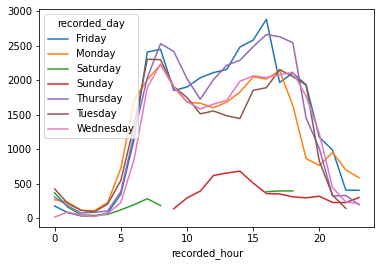

In [ ]:
plot = temp_df.plot()
fig = plot.get_figure()
fig.savefig('/content/drive/Shareddrives/Urban Computing Project/visualizations/bushourvslatecount.png')

In [ ]:
temp_df = grouper['time_difference'].mean()

In [ ]:
temp_df = temp_df.to_frame().reset_index()

In [ ]:
temp_df.head()

,recorded_day,recorded_hour,time_difference
0,Friday,0,-311.056911
1,Friday,1,-375.812500
2,Friday,2,298.960000
3,Friday,3,75.296875
4,Friday,4,-52.969231


In [ ]:
temp_df = temp_df.pivot(index='recorded_hour', columns='recorded_day', values='time_difference')

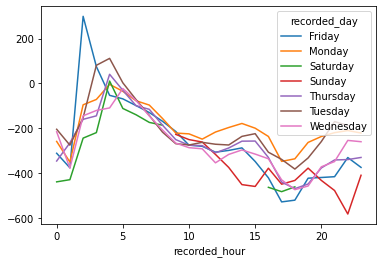

In [ ]:
plot = temp_df.plot()
fig = plot.get_figure()
fig.savefig('/content/drive/Shareddrives/Urban Computing Project/visualizations/bushourvstimedifference.png')

In [35]:
grouper = junatthestop.groupby([pd.Grouper(key='zone')])

In [36]:
temp_df = grouper['late'].sum()

In [37]:
temp_df = temp_df.to_frame().reset_index()

In [38]:
temp_df.head()

,zone,late
0,Allerton/Pelham Gardens,274
1,Alphabet City,475
2,Arden Heights,154
3,Arrochar/Fort Wadsworth,575
4,Astoria,4


In [39]:
temp_df = nyc.merge(temp_df, left_on="zone", right_on="zone")

In [40]:
temp_df.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,late
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((-74.18445 40.69500, -74.18449 40.695...",10
1,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((-73.84793 40.87134, -73.84725 40.870...",274
2,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...",475
3,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((-74.17422 40.56257, -74.17349 40.562...",154
4,6,0.150491,0.000606,Arrochar/Fort Wadsworth,6,Staten Island,"POLYGON ((-74.06367 40.60220, -74.06351 40.602...",575


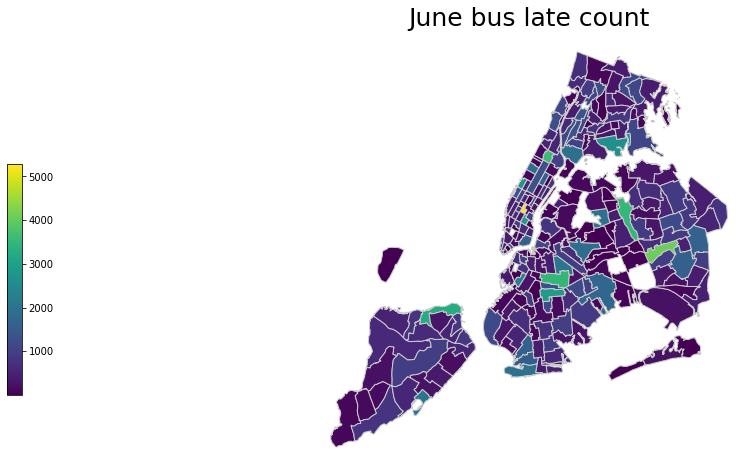

In [41]:
fig, ax = plt.subplots(1, figsize=(20, 8))
title = 'June bus late count'
col = 'late'
source = None
vmin = temp_df[col].min()
vmax = temp_df[col].max()
cmap = 'viridis'
# Remove the axis
ax.axis('off')
temp_df.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)
# Add a title
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})

# Create an annotation for the data source
ax.annotate(source, xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', 
            verticalalignment='bottom', fontsize=10)
            
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)

# Empty array for the data range
sm._A = []

# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)
fig.savefig('/content/drive/Shareddrives/Urban Computing Project/visualizations/busheatmapcount.png')

In [ ]:
temp_df = grouper['time_difference'].mean()

In [ ]:
temp_df = temp_df.to_frame().reset_index()

In [ ]:
temp_df = nyc.merge(temp_df, left_on="zone", right_on="zone")

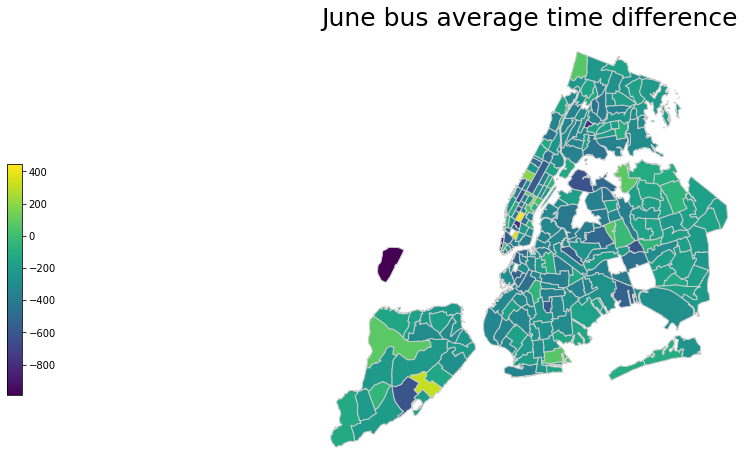

In [ ]:
fig, ax = plt.subplots(1, figsize=(20, 8))
title = 'June bus average time difference'
col = 'time_difference'
source = None
vmin = temp_df[col].min()
vmax = temp_df[col].max()
cmap = 'viridis'
# Remove the axis
ax.axis('off')
temp_df.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)
# Add a title
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})

# Create an annotation for the data source
ax.annotate(source, xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', 
            verticalalignment='bottom', fontsize=10)
            
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)

# Empty array for the data range
sm._A = []

# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)
fig.savefig('/content/drive/Shareddrives/Urban Computing Project/visualizations/busheatmaptimedifference.png')

##Back to useful code

In [ ]:
junbus.dropna(inplace=True)
junbus.drop(columns='DistanceFromStop', inplace=True)

In [ ]:
junbus['Lat'] = junbus['VehicleLocation.Latitude'].apply(pd.to_numeric, errors='coerce')
junbus['Long'] = junbus['VehicleLocation.Longitude'].apply(pd.to_numeric, errors='coerce')
junbus.drop(columns=['VehicleLocation.Latitude', 'VehicleLocation.Longitude'], inplace=True)
junbus

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,NextStopPointName,ArrivalProximityText,ExpectedArrivalTime,ScheduledArrivalTime,Lat,Long
1,2017-06-01 00:03:34,0,B8,4 AV/95 ST,40.616104,-74.031143,BROWNSVILLE ROCKAWAY AV,40.656048,-73.907379,NYCT_430,FOSTER AV/E 18 ST,approaching,2017-06-01 00:03:59,24:06:14,40.635170,-73.960803
2,2017-06-01 00:03:43,1,S61,ST GEORGE FERRY/S61 & S91,40.643169,-74.073494,S I MALL YUKON AV,40.575935,-74.167686,NYCT_8263,MERRYMOUNT ST/TRAVIS AV,approaching,2017-06-01 00:03:56,23:58:02,40.590802,-74.158340
3,2017-06-01 00:03:49,0,Bx10,E 206 ST/BAINBRIDGE AV,40.875008,-73.880142,RIVERDALE 263 ST,40.912376,-73.902534,NYCT_4223,HENRY HUDSON PKY E/W 235 ST,at stop,2017-06-01 00:03:56,24:00:53,40.886010,-73.912647
4,2017-06-01 00:03:31,0,Q5,TEARDROP/LAYOVER,40.701748,-73.802399,ROSEDALE LIRR STA via MERRICK,40.666012,-73.735939,NYCT_8422,HOOK CREEK BL/SUNRISE HY,< 1 stop away,2017-06-01 00:04:03,24:03:00,40.668002,-73.729348
5,2017-06-01 00:03:22,1,Bx1,RIVERDALE AV/W 231 ST,40.881187,-73.90934,MOTT HAVEN 136 ST via CONCOURSE,40.809654,-73.92836,NYCT_4710,GRAND CONCOURSE/E 196 ST,at stop,2017-06-01 00:03:56,23:59:38,40.868134,-73.893032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6730851,2017-06-30 23:53:20,0,Bx11,W 179 ST/BROADWAY,40.8491,-73.9378,W FARMS RD SOUTHERN BL,40.8253,-73.8914,NYCT_700,W 170 ST/EDWARD L GRANT HY,approaching,2017-06-30 23:54:13,24:09:34,40.840354,-73.922210
6730852,2017-06-30 23:53:37,0,B54,JAY ST/MYRTLE PLZ,40.6945,-73.9871,RIDGEWOOD TERM via MYRTLE,40.7005,-73.9101,NYCT_4442,GATES AV/WYCKOFF AV,approaching,2017-06-30 23:53:52,23:44:12,40.699765,-73.911974
6730854,2017-06-30 23:53:21,1,M5,BROADWAY/W 178 ST,40.8485,-73.9377,31 ST 6 AV,40.7478,-73.9888,NYCT_6388,W 135 ST/RIVERSIDE DR,approaching,2017-06-30 23:54:27,23:44:16,40.820420,-73.955842
6730855,2017-06-30 23:53:34,0,M4,W 32 ST/7 AV,40.7494,-73.991,WASH HTS CABRINI BLV via MADSON via BWAY,40.859,-73.9343,NYCT_6392,CENTRAL PK N/5 AV,at stop,2017-06-30 23:53:42,23:50:00,40.797009,-73.948954


In [ ]:
junbus['RecordedAtTime'] = pd.to_datetime(junbus['RecordedAtTime'], errors = 'coerce')
tindex = pd.DatetimeIndex(junbus.RecordedAtTime) 
#Recorded Year, Day, and Month as a separate column for convenience
junbus['RecordDate'] = tindex.strftime('%Y-%m-%d ')

In [ ]:
sTimes = junbus[['ScheduledArrivalTime', 'RecordDate']].loc[junbus.ScheduledArrivalTime >= "24"]

In [ ]:
ymd = sTimes.RecordDate
hours = sTimes.ScheduledArrivalTime.str[0:2]
rest = sTimes.ScheduledArrivalTime.str[2:]
hours = hours.astype(int) - 24
converted = hours.astype(str) + rest
converted = ymd + converted
converted = pd.to_datetime(converted, format = '%Y-%m-%d %H:%M:%S')
converted = converted

In [ ]:
junbus['ExpectedArrivalTime'] = pd.to_datetime(junbus['ExpectedArrivalTime'], errors = 'coerce')

In [ ]:
junbus['scheduled'] = pd.to_datetime(junbus['RecordDate'] + junbus['ScheduledArrivalTime'], format = '%Y-%m-%d %H:%M:%S', errors='coerce')
junbus['scheduled'].fillna(value=converted, inplace=True)

condition = (junbus.scheduled - junbus.RecordedAtTime).astype('timedelta64[m]') >= 1000
junbus.loc[condition, ['scheduled']] = junbus.loc[condition, ['scheduled']] - pd.Timedelta(days=1)

condition = (junbus.scheduled - junbus.RecordedAtTime).astype('timedelta64[m]') <= -1000
junbus.loc[condition, ['scheduled']] = junbus.loc[condition, ['scheduled']] + pd.Timedelta(days=1) 

condition = (junbus.scheduled - junbus.ExpectedArrivalTime).astype('timedelta64[m]') < 0
junbus['late'] = condition

In [ ]:
junbus['time_difference'] = (junbus.scheduled - junbus.ExpectedArrivalTime).astype('timedelta64[s]')

In [ ]:
junbus.head()

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,NextStopPointName,ArrivalProximityText,ExpectedArrivalTime,ScheduledArrivalTime,Lat,Long,RecordDate,scheduled,late,time_difference
1,2017-06-01 00:03:34,0,B8,4 AV/95 ST,40.616104,-74.031143,BROWNSVILLE ROCKAWAY AV,40.656048,-73.907379,NYCT_430,FOSTER AV/E 18 ST,approaching,2017-06-01 00:03:59,24:06:14,40.635170,-73.960803,2017-06-01,2017-06-01 00:06:14,False,135.0
2,2017-06-01 00:03:43,1,S61,ST GEORGE FERRY/S61 & S91,40.643169,-74.073494,S I MALL YUKON AV,40.575935,-74.167686,NYCT_8263,MERRYMOUNT ST/TRAVIS AV,approaching,2017-06-01 00:03:56,23:58:02,40.590802,-74.158340,2017-06-01,2017-05-31 23:58:02,True,-354.0
3,2017-06-01 00:03:49,0,Bx10,E 206 ST/BAINBRIDGE AV,40.875008,-73.880142,RIVERDALE 263 ST,40.912376,-73.902534,NYCT_4223,HENRY HUDSON PKY E/W 235 ST,at stop,2017-06-01 00:03:56,24:00:53,40.886010,-73.912647,2017-06-01,2017-06-01 00:00:53,True,-183.0
4,2017-06-01 00:03:31,0,Q5,TEARDROP/LAYOVER,40.701748,-73.802399,ROSEDALE LIRR STA via MERRICK,40.666012,-73.735939,NYCT_8422,HOOK CREEK BL/SUNRISE HY,< 1 stop away,2017-06-01 00:04:03,24:03:00,40.668002,-73.729348,2017-06-01,2017-06-01 00:03:00,True,-63.0
5,2017-06-01 00:03:22,1,Bx1,RIVERDALE AV/W 231 ST,40.881187,-73.90934,MOTT HAVEN 136 ST via CONCOURSE,40.809654,-73.92836,NYCT_4710,GRAND CONCOURSE/E 196 ST,at stop,2017-06-01 00:03:56,23:59:38,40.868134,-73.893032,2017-06-01,2017-05-31 23:59:38,True,-258.0


In [ ]:
coi = ['RecordedAtTime', 'NextStopPointName', 'time_difference', 'late']
junbus = junbus[coi]

In [ ]:
zone_df = pd.read_csv('/content/drive/Shareddrives/Urban Computing Project/datasets/computed_geocodes.csv')

In [ ]:
zone_df.head()

,BusStop,lat,long,stop_zone,zone,LocationID,borough
0,7 AV/GARFIELD PL,40.762862,-73.981637,Times Sq/Theatre District,Times Sq/Theatre District,230,Manhattan
1,7 AV/W 53 ST,40.762862,-73.981637,Times Sq/Theatre District,Times Sq/Theatre District,230,Manhattan
2,49 ST/5 AV,40.759901,-73.984139,Times Sq/Theatre District,Times Sq/Theatre District,230,Manhattan
3,50 ST/13 AV,40.761662,-73.983897,Times Sq/Theatre District,Times Sq/Theatre District,230,Manhattan
4,7 AV/W 31 ST,40.762862,-73.981637,Times Sq/Theatre District,Times Sq/Theatre District,230,Manhattan


In [ ]:
coi = ['BusStop', 'zone']
zone_df = zone_df[coi]

In [ ]:
zone_df.shape

(11008, 2)

In [ ]:
junbus.shape

(5597777, 19)

In [ ]:
junbus = junbus.merge(zone_df, left_on="NextStopPointName", right_on="BusStop")

In [ ]:
coi = ['RecordedAtTime', 'NextStopPointName', 'time_difference', 'late', 'zone']
junbus = junbus[coi]

In [ ]:
junbus.head()

,RecordedAtTime,NextStopPointName,time_difference,late,zone
0,2017-06-01 00:03:34,FOSTER AV/E 18 ST,135.0,False,Flatbush/Ditmas Park
1,2017-06-01 02:34:04,FOSTER AV/E 18 ST,-156.0,True,Flatbush/Ditmas Park
2,2017-06-01 04:23:29,FOSTER AV/E 18 ST,-146.0,True,Flatbush/Ditmas Park
3,2017-06-01 04:43:53,FOSTER AV/E 18 ST,108.0,False,Flatbush/Ditmas Park
4,2017-06-01 08:04:24,FOSTER AV/E 18 ST,6.0,False,Flatbush/Ditmas Park


In [ ]:
junbus = junbus[~junbus['zone'].isna()]

In [ ]:
junbus.shape

(5574571, 5)

In [ ]:
grouper = junbus.groupby([pd.Grouper(key='RecordedAtTime', freq='10T'), 'zone'])

In [ ]:
grouper.sum()

time_difference  ...  recorded_hour
RecordedAtTime      zone                                        ...               
2017-06-01 00:00:00 Allerton/Pelham Gardens             -284.0  ...              0
                    Alphabet City                       -287.0  ...              0
                    Arrochar/Fort Wadsworth             -534.0  ...              0
                    Auburndale                            91.0  ...              0
                    Bath Beach                           -35.0  ...              0
...                                                        ...  ...            ...
2017-06-30 23:50:00 Williamsburg (South Side)          -5803.0  ...            161
                    Windsor Terrace                     -809.0  ...             69
                    Woodlawn/Wakefield                 -1152.0  ...            138
                    World Trade Center                  -798.0  ...             46
                    Yorkville East                      -450.0  ...             46

[778981 rows x 3 columns]

###Bus Visualizations

In [ ]:
junbus['recorded_hour'] = junbus['RecordedAtTime'].dt.hour
junbus['recorded_day'] = junbus['RecordedAtTime'].dt.day_name()

In [ ]:
grouper = junbus.groupby([pd.Grouper(key='recorded_day'), pd.Grouper(key='recorded_hour')])

In [ ]:
grouper.sum()

time_difference   late
recorded_day recorded_hour                        
Friday       0                   -5830330.0  12353
             1                   -2586821.0   6543
             2                    -880387.0   3318
             3                    -589379.0   2775
             4                   -1073911.0   5227
...                                     ...    ...
Wednesday    19                 -25807013.0  37871
             20                 -15598390.0  27639
             21                 -11483057.0  22045
             22                  -8335831.0  17069
             23                  -6703059.0  13870

[168 rows x 2 columns]

In [ ]:
temp_df = grouper.count()

In [ ]:
temp_df.head()

NextStopPointName  ...  recorded_day
RecordedAtTime zone                                        ...              
2017-06-01     Allerton/Pelham Gardens                  4  ...             4
               Alphabet City                            2  ...             2
               Arrochar/Fort Wadsworth                  2  ...             2
               Auburndale                               3  ...             3
               Bath Beach                               2  ...             2

[5 rows x 5 columns]

In [ ]:
temp_df = temp_df['late']

In [ ]:
temp_df.head()

RecordedAtTime  zone                   
2017-06-01      Allerton/Pelham Gardens    4
                Alphabet City              2
                Arrochar/Fort Wadsworth    2
                Auburndale                 3
                Bath Beach                 2
Name: late, dtype: int64

In [ ]:
temp_df1 = grouper.mean()

In [ ]:
temp_df1.head()

time_difference  ...  recorded_hour
RecordedAtTime zone                                      ...               
2017-06-01     Allerton/Pelham Gardens       -71.000000  ...              0
               Alphabet City                -143.500000  ...              0
               Arrochar/Fort Wadsworth      -267.000000  ...              0
               Auburndale                     30.333333  ...              0
               Bath Beach                    -17.500000  ...              0

[5 rows x 3 columns]

In [ ]:
temp_df1 = temp_df1['time_difference']

In [ ]:
temp_df1.head()

RecordedAtTime  zone                   
2017-06-01      Allerton/Pelham Gardens    -71.000000
                Alphabet City             -143.500000
                Arrochar/Fort Wadsworth   -267.000000
                Auburndale                  30.333333
                Bath Beach                 -17.500000
Name: time_difference, dtype: float64

In [ ]:
temp_df = temp_df.to_frame()
temp_df1 = temp_df1.to_frame()

In [ ]:
temp_df = temp_df.join(temp_df1)

In [ ]:
temp_df.head()

late  time_difference
RecordedAtTime zone                                          
2017-06-01     Allerton/Pelham Gardens     4       -71.000000
               Alphabet City               2      -143.500000
               Arrochar/Fort Wadsworth     2      -267.000000
               Auburndale                  3        30.333333
               Bath Beach                  2       -17.500000

In [ ]:
temp_df.reset_index(inplace=True)

In [ ]:
temp_df.head()

,RecordedAtTime,zone,late,time_difference
0,2017-06-01,Allerton/Pelham Gardens,4,-71.000000
1,2017-06-01,Alphabet City,2,-143.500000
2,2017-06-01,Arrochar/Fort Wadsworth,2,-267.000000
3,2017-06-01,Auburndale,3,30.333333
4,2017-06-01,Bath Beach,2,-17.500000


In [ ]:
temp_df.to_csv('/content/drive/Shareddrives/Urban Computing Project/datasets/junbusfinal.csv')